In [1]:
import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
results_folder = '../../MamaMia/hyperparameter_tuning/tune_results/3d_tuning_run_5'
results = []
for subfolder in os.listdir(results_folder):
    if os.path.isdir(os.path.join(results_folder, subfolder)):
        result_file = os.path.join(results_folder, subfolder, 'result.json')
        if not os.path.exists(result_file):
            continue
        with open(result_file, 'r') as file:
            try:
                result = json.load(file)
            except json.JSONDecodeError:
                continue
            config = result['config']
            result.update(config)
            result.pop('config')
        results.append(result)
results_df = pd.DataFrame(results)
results_df.head()

,mean_5_fold_ranking_score,balanced_accuracy,timestamp,checkpoint_dir_name,done,training_iteration,trial_id,date,time_this_iter_s,time_total_s,...,iterations_since_restore,learning_rate,final_learning_rate,momentum,weight_decay,batch_size,label_smoothing,x_y_resolution,z_resolution,model_key
0,0.553581,0.541881,1751230433,None,False,1,5be23_00076,2025-06-29_20-53-53,2696.893230,2696.893230,...,1,0.000002,1.816592e-06,0.843499,0.000185,21.806055,0.000788,121.123620,30.375227,r3d_18
1,0.000000,0.000000,1751205663,None,False,1,5be23_00038,2025-06-29_14-01-03,3.168197,3.168197,...,1,0.000756,4.093744e-07,0.957137,0.000004,24.054730,0.000502,113.308478,30.201161,swin3d_t
2,0.554298,0.423680,1751236580,None,False,1,5be23_00087,2025-06-29_22-36-20,2475.415060,2475.415060,...,1,0.000263,2.301687e-05,0.959308,0.018906,31.179386,0.001315,92.826150,31.527695,swin3d_t
3,0.000000,0.000000,1751243383,None,False,1,5be23_00103,2025-06-30_00-29-43,4.580576,4.580576,...,1,0.000005,1.580134e-05,0.953682,0.099063,22.502068,0.001210,148.641493,41.139528,swin3d_t
4,0.000000,0.000000,1751217914,None,False,1,5be23_00056,2025-06-29_17-25-14,3.645330,3.645330,...,1,0.000019,5.490008e-08,0.824434,0.000640,22.280655,0.049299,124.409634,49.730515,swin3d_t


In [3]:
results_df['mean_5_fold_ranking_score'] = results_df['mean_5_fold_ranking_score'].map(lambda x: 0.5 if x<0.5 else x)
results_df['balanced_accuracy'] = results_df['balanced_accuracy'].map(lambda x: 0.5 if x<0.5 else x)

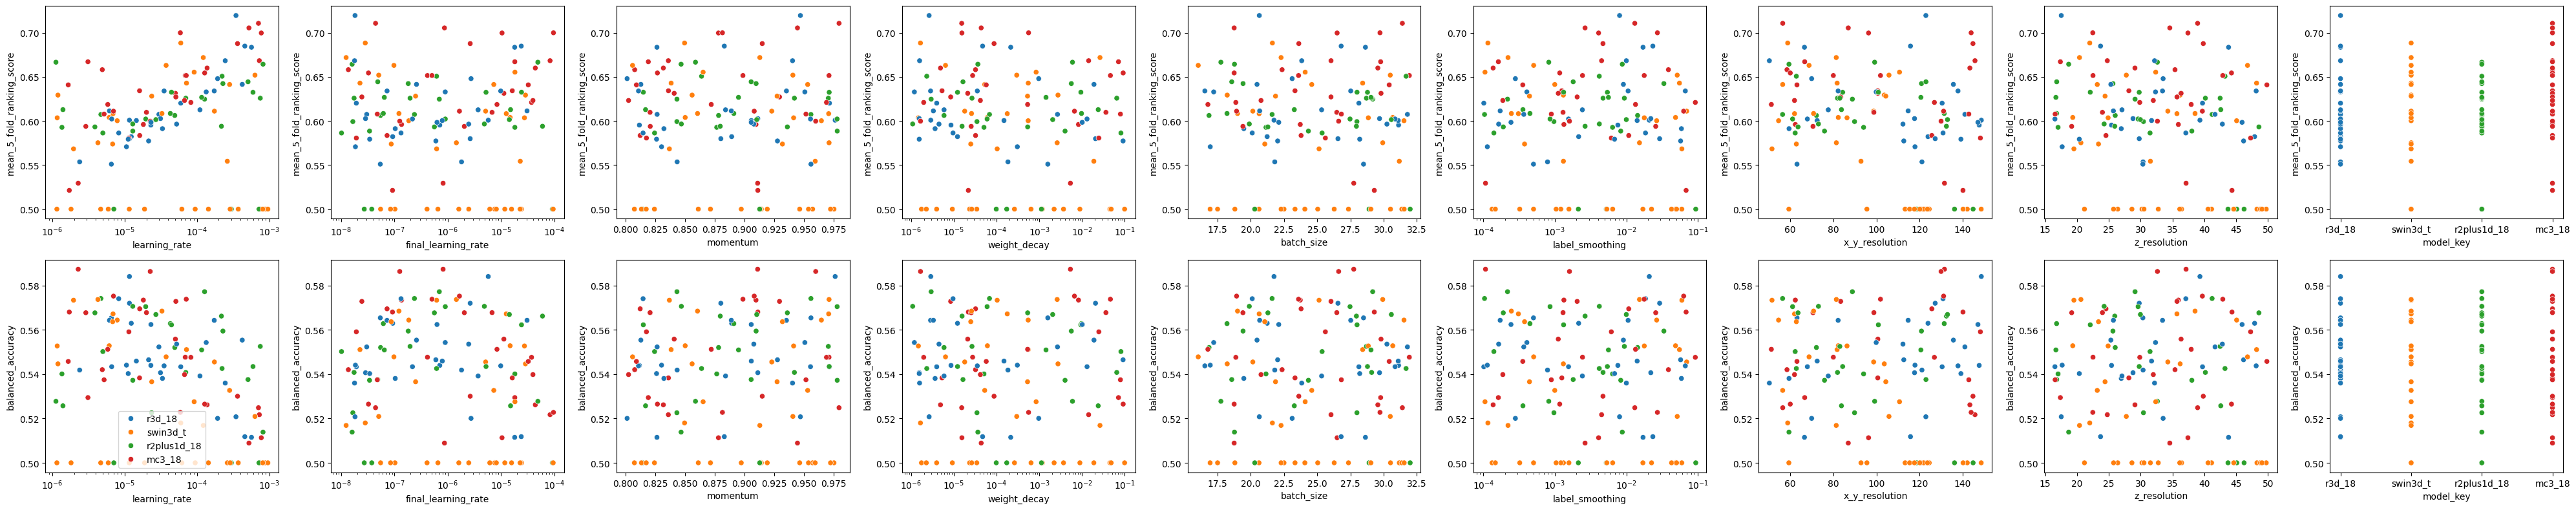

In [4]:
hyperparameters = ['learning_rate', 'final_learning_rate', 'momentum', 'weight_decay', 'batch_size', 'label_smoothing', 'x_y_resolution', 'z_resolution', 'model_key']

fig, ax = plt.subplots(2, len(hyperparameters), figsize=(40, 8))
for i, hyperparameter in enumerate(hyperparameters):
    sns.scatterplot(data=results_df, x=hyperparameter, y='mean_5_fold_ranking_score', hue='model_key', ax=ax[0][i])
    sns.scatterplot(data=results_df, x=hyperparameter, y='balanced_accuracy', hue='model_key', ax=ax[1][i])
    if hyperparameter in ['learning_rate', 'weight_decay', 'final_learning_rate', 'label_smoothing']:
        ax[0][i].set_xscale('log')
        ax[1][i].set_xscale('log')
    if i==0:
        ax[0][i].legend().remove()
        ax[1][i].legend(loc='lower center')
    else:
        ax[0][i].legend().remove()
        ax[1][i].legend().remove()
plt.tight_layout()
plt.show()

In [5]:
results_df['selected_trials'] = (results_df['balanced_accuracy'] > 0.56) & (results_df['mean_5_fold_ranking_score'] > 0.609)

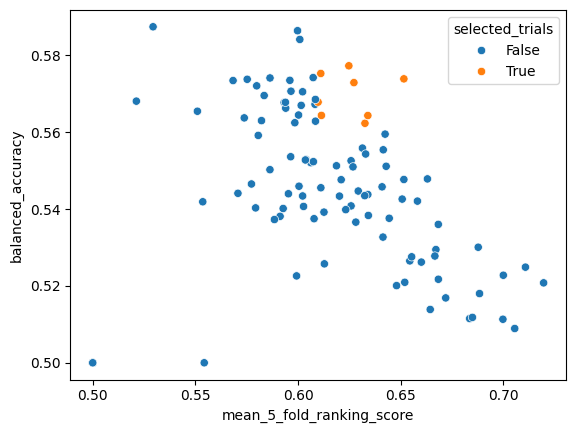

In [6]:
sns.scatterplot(data=results_df, x='mean_5_fold_ranking_score', y='balanced_accuracy', hue='selected_trials')
plt.show()

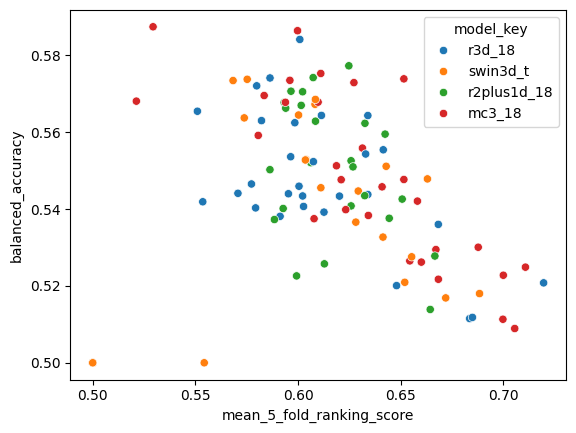

In [7]:
sns.scatterplot(data=results_df, x='mean_5_fold_ranking_score', y='balanced_accuracy', hue='model_key')
plt.show()

In [8]:
results_df[results_df['selected_trials']]

,mean_5_fold_ranking_score,balanced_accuracy,timestamp,checkpoint_dir_name,done,training_iteration,trial_id,date,time_this_iter_s,time_total_s,...,learning_rate,final_learning_rate,momentum,weight_decay,batch_size,label_smoothing,x_y_resolution,z_resolution,model_key,selected_trials
5,0.624710,0.577254,1751198728,None,False,1,5be23_00022,2025-06-29_12-05-28,2487.232129,2487.232129,...,0.000128,6.958349e-07,0.843312,0.000003,29.176335,0.000217,88.817362,29.119409,r2plus1d_18,True
42,0.627182,0.572877,1751200356,None,False,1,5be23_00024,2025-06-29_12-32-36,1847.006352,1847.006352,...,0.000051,2.444088e-08,0.929360,0.000008,26.039159,0.002046,83.386656,35.711756,mc3_18,True
46,0.632557,0.562296,1751207146,None,False,1,5be23_00036,2025-06-29_14-25-46,2456.622670,2456.622670,...,0.000044,2.426783e-05,0.815083,0.009394,27.999687,0.001322,100.880759,22.073107,r2plus1d_18,True
87,0.633964,0.564317,1751216989,None,False,1,5be23_00051,2025-06-29_17-09-49,1795.721781,1795.721781,...,0.000173,7.262422e-08,0.935176,0.000003,27.523696,0.010562,82.198143,33.430116,r3d_18,True
89,0.611360,0.564347,1751226909,None,False,1,5be23_00070,2025-06-29_19-55-09,2142.413458,2142.413458,...,0.000006,3.087800e-05,0.888933,0.000003,20.669030,0.000171,114.729135,25.712786,r3d_18,True
98,0.609742,0.567805,1751232295,None,False,1,5be23_00079,2025-06-29_21-24-55,1856.316144,1856.316144,...,0.000020,6.802396e-06,0.820763,0.036168,26.474508,0.001300,98.810613,23.987055,mc3_18,True
114,0.611052,0.575260,1751238874,None,False,1,5be23_00088,2025-06-29_23-14-34,4504.839208,4504.839208,...,0.000007,1.660209e-06,0.908158,0.006647,18.931808,0.063271,131.181619,39.692861,mc3_18,True
117,0.651506,0.573858,1751210181,None,False,1,5be23_00040,2025-06-29_15-16-21,3029.494709,3029.494709,...,0.000071,5.066724e-07,0.898686,0.046109,23.596827,0.017752,101.867651,42.898613,mc3_18,True


In [ ]:
trial_ids = results_df[results_df['selected_trials']]['trial_id'].to_list()

#selected_trial_ids_path = '../../MamaMia/hyperparameter_tuning/selected_trial_ids_3d_tuning_run_5.json'
#with open(selected_trial_ids_path, 'w') as file:
#    json.dump(trial_ids, file, indent=4)
